# CSCE 670 :: Information Storage and Retrieval :: Spring 2020

## Spotlight  : Textacy



## Textacy : A higher-level NLP built on spaCy
Textacy is a Python library for performing higher-level natural language processing (NLP) tasks, built on the high-performance spaCy library. With the basics — tokenization, part-of-speech tagging, dependency parsing, etc. — offloaded to another library, textacy focuses on tasks facilitated by the ready availability of tokenized, POS-tagged, and parsed text.


### Features
* Stream text, json, csv, and spaCy binary data to and from disk
* Clean and normalize raw text, before analyzing it
* Explore a variety of included datasets, with both text data and metadata from Congressional speeches to historical literature to Reddit comments
* Access and filter basic linguistic elements, such as words and ngrams, noun chunks and sentences
* Extract named entities, acronyms and their definitions, direct quotations, key terms, and more from documents
* Compare strings, sets, and documents by a variety of similarity metrics
* Transform documents and corpora into vectorized and semantic network representations
* Train, interpret, visualize, and save sklearn-style topic models using LSA, LDA, or NMF methods
* Identify a text’s language, display key words in context (KWIC), true-case words, and navigate a parse tree

### Installation
#### The simple way to install textacy is via pip:
     $ pip install textacy

#### or conda:
     $ conda install -c conda-forge textacy

#### Importing Textacy

In [1]:
import textacy
#since most the textacy functionality works on spacy-parsed document, we import spacy as well
import spacy
nlp = spacy.load('en_core_web_lg')

## Information Retreival using Textacy

##### Information Extraction
Functions to extract various elements of interest from documents already parsed by spaCy, such as n-grams, named entities, subject-verb-object triples, and acronyms.

In [2]:
sample_text1 = """Manchester United Football Club is a professional football club based in Old Trafford, Greater \ 
Manchester, England, that competes in the Premier League, the top flight of English football. Nicknamed "the Red Devils", \
the club was founded as Newton Heath LYR Football Club in 1878, changed its name to Manchester United in 1902 and moved \ 
to its current stadium, Old Trafford, in 1910."""

In [3]:
spacy_text1 = nlp(sample_text1)

###### Removing Stop-words

In [4]:
print(list(textacy.extract.words(spacy_text1, filter_stops=True, filter_punct=False, filter_nums=False )))

[Manchester, United, Football, Club, professional, football, club, based, Old, Trafford, ,, Greater, \, Manchester, ,, England, ,, competes, Premier, League, ,, flight, English, football, ., Nicknamed, ", Red, Devils, ", ,, club, founded, Newton, Heath, LYR, Football, Club, 1878, ,, changed, Manchester, United, 1902, moved, \, current, stadium, ,, Old, Trafford, ,, 1910, .]


##### Removing punctuations

In [5]:
print(list(textacy.extract.words(spacy_text1, filter_stops=False, filter_punct=True, filter_nums=False)))

[Manchester, United, Football, Club, is, a, professional, football, club, based, in, Old, Trafford, Greater, Manchester, England, that, competes, in, the, Premier, League, the, top, flight, of, English, football, Nicknamed, the, Red, Devils, the, club, was, founded, as, Newton, Heath, LYR, Football, Club, in, 1878, changed, its, name, to, Manchester, United, in, 1902, and, moved, to, its, current, stadium, Old, Trafford, in, 1910]


###### Removing numbers

In [6]:
print(list(textacy.extract.words(spacy_text1, filter_stops=False, filter_punct=False, filter_nums=True)))

[Manchester, United, Football, Club, is, a, professional, football, club, based, in, Old, Trafford, ,, Greater, \, Manchester, ,, England, ,, that, competes, in, the, Premier, League, ,, the, top, flight, of, English, football, ., Nicknamed, ", the, Red, Devils, ", ,, the, club, was, founded, as, Newton, Heath, LYR, Football, Club, in, ,, changed, its, name, to, Manchester, United, in, and, moved, \, to, its, current, stadium, ,, Old, Trafford, ,, in, .]


##### Preprocessing text (stop-words + punctuations + numbers)

In [7]:
preprocessed_text = list(textacy.extract.words(spacy_text1, filter_stops=True, filter_punct=True, filter_nums=True))
print(preprocessed_text)

[Manchester, United, Football, Club, professional, football, club, based, Old, Trafford, Greater, Manchester, England, competes, Premier, League, flight, English, football, Nicknamed, Red, Devils, club, founded, Newton, Heath, LYR, Football, Club, changed, Manchester, United, moved, current, stadium, Old, Trafford]


##### Filter by POS

In [8]:
print(list(textacy.extract.words(spacy_text1, filter_stops=True, filter_punct=True, filter_nums=True,include_pos="noun")))

[football, club, flight, football, club, stadium]


##### To lower case

In [9]:
import textacy.ke
print(list(textacy.ke.utils.normalize_terms(preprocessed_text,normalize="lower")))

['manchester', 'united', 'football', 'club', 'professional', 'football', 'club', 'based', 'old', 'trafford', 'greater', 'manchester', 'england', 'competes', 'premier', 'league', 'flight', 'english', 'football', 'nicknamed', 'red', 'devils', 'club', 'founded', 'newton', 'heath', 'lyr', 'football', 'club', 'changed', 'manchester', 'united', 'moved', 'current', 'stadium', 'old', 'trafford']


##### Lemmatize

In [10]:
print(list(textacy.ke.utils.normalize_terms(preprocessed_text,normalize="lemma")))

['Manchester', 'United', 'Football', 'Club', 'professional', 'football', 'club', 'base', 'Old', 'Trafford', 'Greater', 'Manchester', 'England', 'compete', 'Premier', 'League', 'flight', 'english', 'football', 'nickname', 'Red', 'Devils', 'club', 'found', 'Newton', 'Heath', 'LYR', 'Football', 'Club', 'change', 'Manchester', 'United', 'move', 'current', 'stadium', 'Old', 'Trafford']


##### N-Grams

In [11]:
list(textacy.extract.ngrams(preprocessed_text,4))

[[Manchester, United, Football, Club],
 [United, Football, Club, professional],
 [Football, Club, professional, football],
 [Club, professional, football, club],
 [professional, football, club, based],
 [football, club, based, Old],
 [club, based, Old, Trafford],
 [based, Old, Trafford, Greater],
 [Old, Trafford, Greater, Manchester],
 [Trafford, Greater, Manchester, England],
 [Greater, Manchester, England, competes],
 [Manchester, England, competes, Premier],
 [England, competes, Premier, League],
 [competes, Premier, League, flight],
 [Premier, League, flight, English],
 [League, flight, English, football],
 [flight, English, football, Nicknamed],
 [English, football, Nicknamed, Red],
 [football, Nicknamed, Red, Devils],
 [Nicknamed, Red, Devils, club],
 [Red, Devils, club, founded],
 [Devils, club, founded, Newton],
 [club, founded, Newton, Heath],
 [founded, Newton, Heath, LYR],
 [Newton, Heath, LYR, Football],
 [Heath, LYR, Football, Club],
 [LYR, Football, Club, changed],
 [Foot

In [12]:
sample_text2 = '''Ned is a fictional character. Ned is the lord of Winterfell, an ancient fortress in the North of the \
fictional continent of Westeros. Though the character is established as the main character in the novel and \ 
the first season of the TV adaptation, Martin's plot twist involving Ned shocked both readers of the book and viewers \
of the TV series. Ned is the leader of the Stark Family. Ned is a father of six children.'''

sample_text3 = """London is the capital and most populous city of England and  the United Kingdom. \
Standing on the River Thames in the south east of the island of Great Britain, \ 
London has been a major settlement  for two millennia.  It was founded by the Romans, \ 
who named it Londinium. """

### Semi-structured Statement Extraction
We can use it to search the parse tree for simple statements where the subject is the query term and the verb is a form of “be”. That should help us find facts about the query.

In [13]:
#semistructured_statements

def summary(sentence, matchWord):
    summary = ''
    sentobj = nlp(sentence)
    sentences = textacy.extract.semistructured_statements(sentobj, matchWord, cue = 'be')
    print("Facts on",matchWord,":")
    for i, x in enumerate(sentences):
        subject, verb, fact = x
        
        print('    '+str(i+1) +' : '+(str(fact))+" ")
    
summary(sample_text2, 'Ned')
print()
summary(sample_text3, 'London')

Facts on Ned :
    1 : a fictional character 
    2 : the lord of Winterfell, an ancient fortress in the North of the fictional continent of Westeros 
    3 : the leader of the Stark Family 
    4 : a father of six children 

Facts on London :
    1 : the capital and most populous city of England and  the United Kingdom 
    2 : a major settlement  for two millennia.   


Maybe that’s not too impressive. But if you run that same code on the entire London wikipedia article text instead of just three sentences, you’ll get this more impressive result:

In [14]:
# this cell is just to get the content from a url, not part of textacy

import urllib.request  # the lib that handles the url stuff
from bs4 import BeautifulSoup
from bs4.element import Comment
import urllib.request

url = "https://en.wikipedia.org/wiki/London"

def tag_visible(element):
    if element.parent.name in ['style', 'script', 'head', 'title', 'meta', '[document]']:
        return False
    if isinstance(element, Comment):
        return False
    return True

def text_from_html(body):
    soup = BeautifulSoup(body, 'html.parser')
    texts = soup.findAll(text=True)
    visible_texts = filter(tag_visible, texts)  
    return u" ".join(t.strip() for t in visible_texts)

html = urllib.request.urlopen(url).read()
# print(html)
webpage = text_from_html(html)
spacy_webpage = nlp(webpage)

In [15]:
summary(webpage, 'London')

Facts on London :
    1 : the capital and largest city of England and the United Kingdom 
    2 : a major settlement for two millennia 
    3 : the largest city in the EU 
    4 : the world's most populous city from c. 1831 to 1925 
    5 : an ancient name, already attested in the first century AD, usually in the Latinised form Londinium ; [62 
    6 : beyond all comparison the largest town in England 
    7 : the focus of the Peasants' Revolt in 1381 
    8 : also a centre of England's Jewish population before their expulsion by Edward I in 1290 
    9 : still very compact 
    10 : the seat of the Government of the United Kingdom 
    11 : vulnerable to flooding 
    12 : "one of the World's Greenest Cities" with more than 40 per cent green space or open water 
    13 : the most populous city and metropolitan area of the European Union and the second most populous in Europe 
    14 : the 19th largest city and the 18th largest metropolitan region 
    15 : Christian, and has a large n

Now things are getting interesting! That’s a pretty impressive amount of information we’ve collected automatically.

### Keyterm Extraction
Extract key terms from a document using the TextRank algorithm, or a variation thereof.

* TextRank    : window_size=2, edge_weighting="binary", position_bias=False
* SingleRank  : window_size=10, edge_weighting="count", position_bias=False
* PositionRank: window_size=10, edge_weighting="count", position_bias=True

In [16]:
textacy.ke.textrank(nlp(sample_text1),window_size=2, edge_weighting="binary", position_bias=True, normalize='lemma')

[('Manchester United Football Club', 0.18955458792777558),
 ('Newton Heath LYR Football Club', 0.11568925131244044),
 ('professional football club', 0.07646104362386522),
 ('english football', 0.03909831381107171),
 ('Old Trafford', 0.03452339207049752),
 ('Premier League', 0.02162215389538466),
 ('current stadium', 0.0191623214192488),
 ('Red Devils', 0.017873162108153262),
 ('Greater', 0.013454210153143843),
 ('flight', 0.008986857047982064)]

##### SGRank

In [17]:
textacy.ke.sgrank(spacy_webpage, normalize='lemma', window_size=10)

[('London', 0.3521892023818906),
 ('United Kingdom', 0.08137402706926102),
 ('Greater London', 0.06589578101880868),
 ('New York', 0.034077188960726416),
 ('city', 0.02710506330568965),
 ('London Authority', 0.021667334949938652),
 ('main article', 0.021323436571774778),
 ('area', 0.012680254882822014),
 ('England', 0.011955010350102317),
 ('population', 0.010525048396526364)]

##### TextStats

In [18]:
ts = textacy.TextStats(spacy_webpage)
ts.basic_counts

{'n_sents': 3983,
 'n_words': 28167,
 'n_chars': 141362,
 'n_syllables': 43293,
 'n_unique_words': 5869,
 'n_long_words': 7813,
 'n_monosyllable_words': 17850,
 'n_polysyllable_words': 3555}

### Vectorization & Topic Modeling
Topic modeling is automatic discovering the abstract “topics” that occur in a collection of documents. It can be used for providing more informative view of search results, quick overview for set of documents or some other services.

In [19]:
import textacy.datasets #this library also comes with several datasets that we can use for modeling 

Here we use Capitol Words Congressional speeches as our dataset.
It is a collection of ~11k (almost all) speeches given by the main protagonists of the 2016 U.S. Presidential election that had previously served in the U.S. Congress – including Hillary Clinton, Bernie Sanders, Barack Obama, Ted Cruz, and John Kasich – from January 1996 through June 2016.

Efficiently stream documents from disk and into a processed corpus:

In [20]:
ds = textacy.datasets.CapitolWords()
records = ds.records(speaker_name={'Hillary Clinton', 'Barack Obama'})
corpus = textacy.Corpus("en_core_web_sm", data=records)

Represent corpus as a document-term matrix, with flexible weighting and filtering:

In [21]:
vectorizer = textacy.vsm.Vectorizer(tf_type='linear', apply_idf=True, idf_type='smooth')
doc_term_matrix = vectorizer.fit_transform((doc._.to_terms_list(ngrams=1, named_entities=True, as_strings=True) for doc in corpus))

Train and interpret a topic model:

In [22]:
import textacy.tm
model = textacy.tm.TopicModel('nmf', n_topics=10) #We use Non-negative Matrix Factorization method
model.fit(doc_term_matrix)
doc_topic_matrix = model.transform(doc_term_matrix)
doc_topic_matrix.shape

(1241, 10)

In [23]:
for topic_idx, top_terms in model.top_topic_terms(vectorizer.id_to_term, top_n=10):
    print('topic', topic_idx, ':', '   '.join(top_terms))

topic 0 : Postal   Tax Court   Court   torture   Tax   Postal Service   Service   section   Act   judge
topic 1 : Owen   Justice   dissent   Texas   majority   case   opinion   judicial   Court   activism
topic 2 : woman   â€   health   care   people   New   need   work   York   drug
topic 3 : gun   dealer   manufacturer   firearm   exception   negligent   seller   criminal   weapon   suit
topic 4 : visa   student   United   United States   States   international   Homeland   security   shall   Strategy
topic 5 : blind   tribe   Indians   earning   welfare   tanf   tribal   Social   indian   program
topic 6 : meat   eat   product   Listeria   ready   poultry   monocytogene   Secretary   risk   b
topic 7 : school   student   child   education   teacher   college   district   test   tax   $
topic 8 : Brother   Stephen   College   Sullivan   Brothers   Manhattan   Manhattan College   Salle   St.   La
topic 9 : EPA   air   White   White House   House   inspector   asbestos   New   general 

##### Visualization
Make a “termite” plot, typically used for assessing topic models with a tabular layout that promotes comparison of terms both within and across topics.

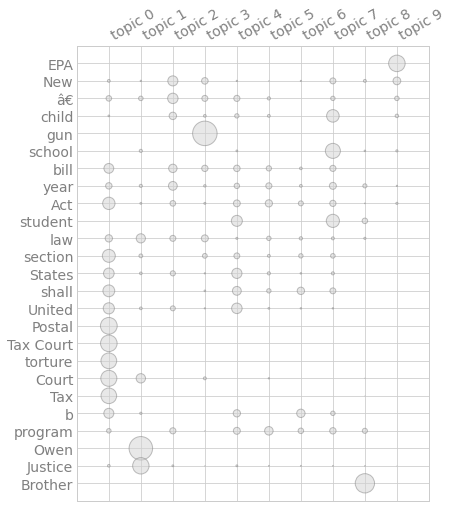

In [24]:
model.termite_plot(doc_topic_matrix, vectorizer.id_to_term, topics=-1,  n_terms=25, sort_terms_by='seriation') 

### Conclusion
There are a lot of libraries available out there which has a list of feature more extensive than the one offered by textacy. But textacy is very easy to configure and use, when compared to other bigshot libraries like NLTK. Since it is built on spaCy it also works really fast. Textacy has many more features to explore. 

### References
* https://textacy.readthedocs.io/en/latest
* https://chartbeat-labs.github.io/textacy/build/html/index.html
* https://pypi.org/project/textacy